## Generative Models

For this week's report I'm going  I came accross a video where a model could complete images given only half of the pixels. The video that piqued my interest for this report is here https://www.youtube.com/watch?v=-6Xn4nKm-Qw. The video merely introduces the paper and I would like to research more about this method and compare it to other one that I have often seen for image generation (GANs).

# Paper 1: Generative Adversarial Nets
https://arxiv.org/pdf/1406.2661.pdf

Supplemental Sources: https://medium.com/@rahuljain13101999/maxout-learning-activation-function-279e274bbf8e

Up until this point when the paper was written, the goal of deep learning algorithms had primarily been for discriminative tasks. The authors note that deep generative models have had little impacto n the field as there is difficulty in probabilistic computations due to maximum likelihood estimation and utilizing linear units in a generative setting. In an adversarial net setup, a generative model is put against an opposing model (the adversary) which aims to determine whether an input is from the model distribution or from the data distribution. The paper uses an interesting analogy that better expresses this in real terms: a team of counterfeiters are trying to make currency and use it without being caught while the descriminative model is like the police, trying to detect this counterfeit currency. Competition is what ultimately results in each side getting better and improve until the falsifications can no longer be told apart from the true examples.

While I have seen the uses of GANs in the space of NLP and computer vision, the paper will be exploring a case where the generative model generates samples through random noise from a multilayer perceptron (MLP) and the descriminative model is also an MLP. This special case is what the authors deem "adversarial nets." At the time, this was a vast improvement as no inference or Markov chains were necessary to accomplish this task. Previous works for generative models  included restricted Boltzmann machines and deep Boltzmann machines 



Using two models that are multilayer perceptrons makes the implementation for adversarial networks straightforward. Some definitions:
- $p_g$ is the generator's distribution over x
- prior input noise variables $p_z(z)$ - a mapping to data space $G(z;\theta_g)$ with $G$ being a differentiable function represented by an MLP with parameters $\theta_g$
- a second MLP $D(x;\theta_d)$ outputs a single scalar. $D(x)$ is the probability that x came from the input data rather than the generator's distrubtion over x ($p_g$)

$D$, the descriminant model, is trained such that we maximize the correct labels of training examples and samples that come from $G$, our generator model. $G$, on the other hand, is trained to minimize $log(1-D(G(z)))$. The intuition is better explained next by what they call a "two-player minimax game" and the value function is as follows: 

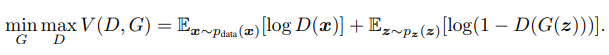

Note that in the first term of the function, we do not have $G$ which means that the generator has no influence on the value function here and thus is not particularly useful to us when trying to minimize $G$. The second term includes $D$ and $G$ where we can minimize $G$ in $E_x[log(1-D(G(Z)))]$. We can already see that taking the derivative of this function to obtain the gradient in respect to $G$ will eliminate this first term. To optimize this function we take multiple steps (k steps) in $D$ and one step of optimizing $G$. This approach avoids overfitting from optimizing $D$ first. The authors note that the value function above may not provide an adequate gradient for $G$ and that the model can get stuck. They note that when $G$ performs poorly, it is very easy for $D$ to reject samples because the samples are easy to distringuish from training data. This results in saturation of the function because $D(G(z))$ is consistently small, which means that $log(1-D(G(z))$ will consistently be close to 0 and result in weights not be updated during backpropagation. Instead, training $G$ to maximize $log(D(G(Z))$ results in better gradients early on in the training process.

I think the pseudo pseudo-code for the training algorithm below summarizes itself quite well and illustrates the training process: 

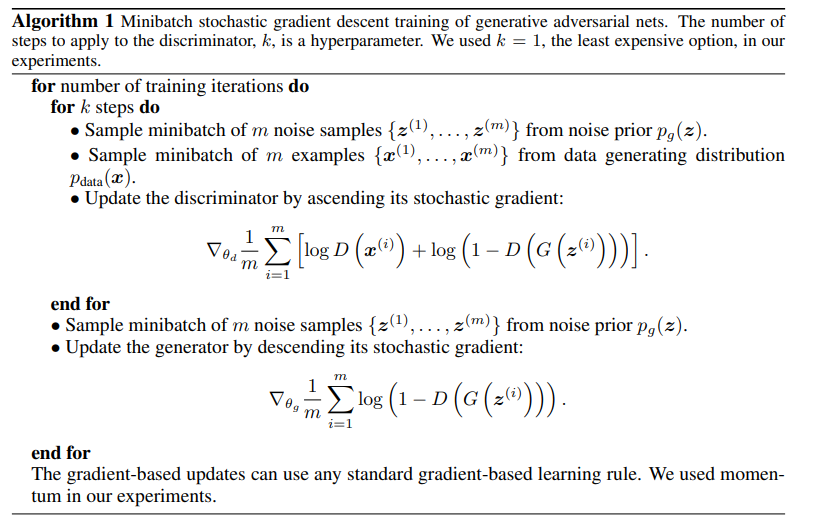


Using the algorithm above, we move on to the experiements on MNIST, Toronto Face Database, and CIFAR 10. In their models they used a combination of ReLU and sigmoid activations for the generator and maxout activations for the descriminator. To briefly cover the Maxout activation function I looked at the blog post on Medium listed in my sources above. A Maxout unit is an activation function which has learnable parameters and can be thought of as "a piecewise linear approximation to an arbitrary convex function". The function is given as $h(x) = max(Z_1, Z_2, ..., Z_n)$ where $Z_1, Z_2, ..., Z_n = W_1*x+b_1, W_2*x+b_2, ..., W_n*x+b_n$. We can see that there are n different linear functions and we are simply taking the max among these n functions to get our activation. The image below demonstrates how we can cleverly reconstruct multiple activation functions using a combination of linear activation functions. 

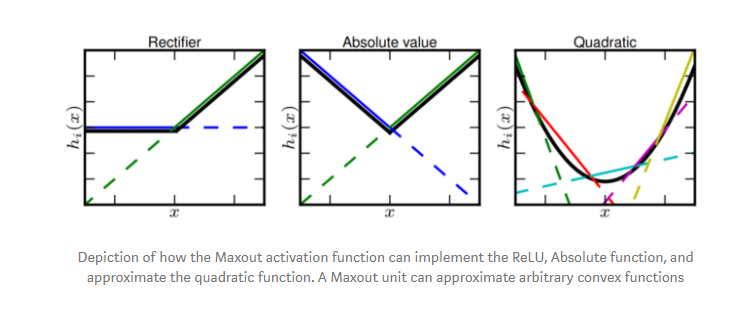

The dashed lines/solid colored lines show the linear functions of the Maxout while the solid black line shows the "original" activation function that is being replicated. For example, to replicate the quadratic function we can use 4 lines to approximate it. It is important to note that Maxout can only be used for convex functions. Now comes one of the most important aspects of the MaxOut layer. Since any continuous piecewise linear function can be expressed as the difference of two convex piecewise linear functions, we can use this fact to approximate any continuous function. We can expand upon this idea to include multiple MaxOut units to increase the capacity of the MaxOut layer to better approximate any continuous piecewise linear function, thus making them extremely useful.

Returning to the experiements of the GAN, the researchers also implemented dropout on the discriminator net only. While they could have used dropout or noise in other layers of the generator network, they used noise as the input to the only the bottommost layer of the network. They estimated the probability of the test set data under $p_g$ by utilizing a gaussian kernel density estimation (i.e. Gaussian Parzen window) to samples generated with $G$ and calculated the log-likelihood under the distribution. Below are the results of the model compared to other popular models at the time-- Deep Belief Networks, Stacked Convolutional AutoEncoder, and Deep Generative Stochastic Networks. We can see that the adversarial nets performed better than all other methods on MNIST, but were slightly worse than stacked CAEs on the TFD dataset.

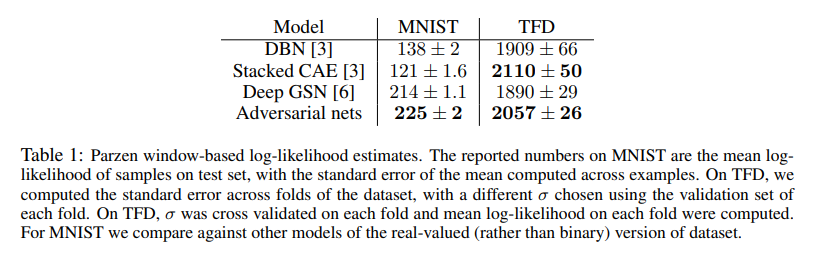

As noted in the paper, their method of estimating the likelihood is susceptible to high variance and lacks performance in high dimensional spaces but this was the best method known at the time. After training, they generated images from the generator net and while the researchers are modest about the performance, I think the results are quite good. The images with the yellow boxes below can be considered the "nearest neighbor" to the samples on the left that were generated from the model. While we can see imperfections, the results are stil quite impressive. 

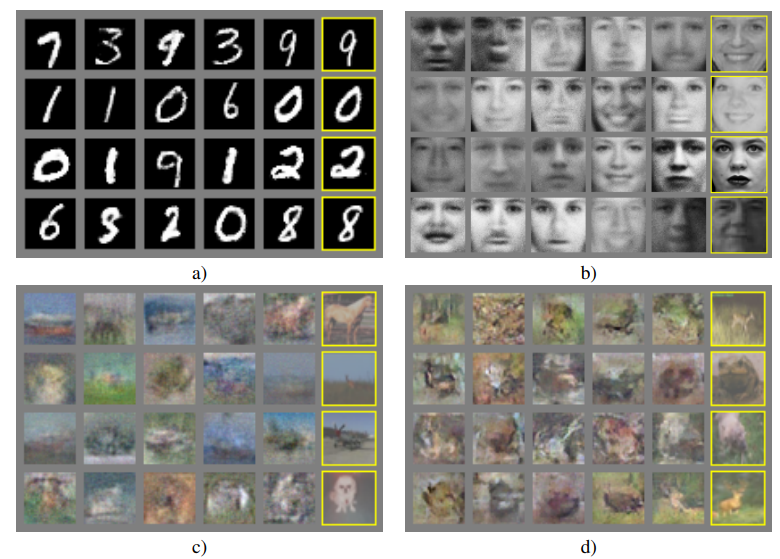

a) is MNIST b)TFD, c)CIFAR-10 (fully connected model) d) CIFAR-10 (convolutional discriminator and deconvolutional generator)

Lastly, we move on to the advantages and disadvantages of using such networks. A disadvantage is that there is no building of a data distribution ($p_g(x)$), but you can only sample from this distribution. Another disadvantage is that $D$ and $G$ must be trained simultaneously and that you cannot train $G$ too much without updating $D$. The advantages though are that Markov chains are not used, no inference is needed during learning, and the architecture is open in a sense that different functions can be used within the model itself. The authors note these are primarily for computation purposes, but there are benefits that go beyond a strictly computational lense. If the generator network is updated directly with gradients which prevents inputs from being copied directly into the parameters of the generator. Compared to Markov models require a somewhat blurry distribution while the adversatial networks can utilize degenerate distributions. While the paper provids a table that compares deep directed graphical models, deep unidrected graphical models, generative autoencoders, and the adversarial networks--I really think they were only trying to display a few key points:
- Other models require inference during training
- Markov chain Monte Carlo based methods can be avoided (a huge benefit of using a GAN is to avoid this!)
- evaluation of $p(x)$ is possible in GANs through approximation with gaussian kerdel density estimation
- Model design is very flexible

We close out by looking at the cncolusions and propositions for future ideas. The ideas presented above can be extended to a conditional generative model $p(x|c)$, where c is an input to $G$ and $D$. When $G$ produces an "$x$" to be fed into the decriminator, you can pass the $x$ through an encoder to to generate a noise to be fed back into the generator. These models can also be used to generate new data where data sets are small and improve the performance of classification models. As noted above as a disadvantage, the authors propose better ways to train $G$ and $D$ and obtaining better distributions to sample noise during training.

### Unsupervised Pre Training

Reference: https://www.youtube.com/watch?v=Oq38pINmddk

In the introduction of the next paper, I came across unsupervised pre-training which I was unfamiliar with. Before getting into the paper I thought I would summarize here first. 

To answer this I turned to the youtube video above. The video introduces that unsupervised pre training was introduced to solve the problem of overfitting in neural networks. Instead of initializing the hidden layers randomly, you can use unsupervised learning to do so. Take an example of identifying a character versus random noise. We want to automatically find a relationship as to what represents the character image versus the random noise without explicit labeling. The method that is typically used is called greedy, layer-wise procedure in which it adds a hidden layer one unit at a time and train it's parameters using an unsupervised learning algorithm such as an autoencoder or restricted boltzmann machine. This approach is continued iteratively with the inclusion of new layers, while the previous layers weights are held constant.

There is a nice breakdown in the video of what this is accomplishing. The first layer is analagous to finding hideen unit features that are more common in the data, the second layer is findind combinations of features, and the third layer would find combinations of those combinations, and so on. Ideally, this method will initialize a model that is less prone to overfitting on the data. Next, we turn to fine tuning after the layers have been pre trained where the model is updated using backpropagation for the supervised task. The pseudocode for this method is:

##### Pre Training

------------------------------------------------------

for 1st layer to last layer:

build unsupervised set:
    
($h^0(x) = x$) else $D$ = \{$h^{l-1}(x^t)\}^T_{t=1}$ (compute representation of previous layer)
 
train a greedy module, i.e. RBM or autoencoder on $D$
  
use layer weights and biases of greedy module to initialize network parameters $W^l$, $b^l$

----------------------------------------------------------------------------------------------

Initialize the output layer $W^{(L+1)}$, $b^{(L+1)}$

Train the whole network using supervised SGD with backpropagation

$\newline$

What naturally follows is what method should be used for unsupervised learning? Initially, research showed that stacked restricted Boltzmann machines were considered, but later research showed that stacked autoencoders were an improvement. Lastly, there has been a variety of algorithms proposed for the unsupervised learning step but the takeaway is that regardless of choice of algorithm it has been shown that this process can better initialize the weights of a network.

### Sparse Transformer
Source: https://openai.com/blog/sparse-transformer/

The Sparse Transformer incorporates several improvements over other transformers, most notably, less computational complexity that can be used in images, videos, or sounds. Previous models were designed specificially for a single domain but Sparse Transformer can handle multiple domains and much longer sequences.

Traditionally when implementing a transformer it is very computationall expensive due to the creation of an N $\times$ N attention matrix for every layer and attention head. This is evident in the following table which shows the meory usage among different domains: 

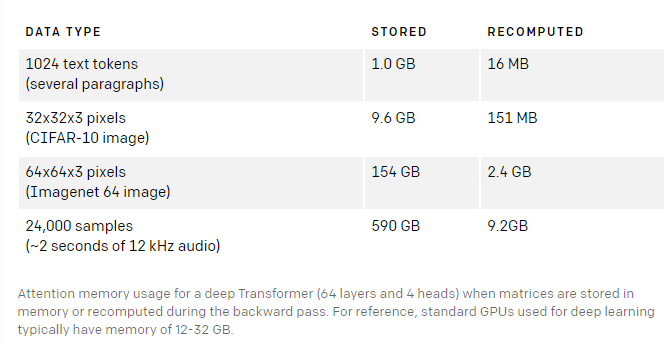

The authors at OpenAI note that even a single attention matrix can become quite large, which seems like it would be especially problematic when applying this technique to image data. They propose sparse attention patterns in which an output position only gets weightings from a subset of input positions. If the subset is sufficiently small, computational complexity decreases drastically and is feasible for very long sequences. In their example they use a subset of $\sqrt{N}$ which makes the complexity $O(N\sqrt{N})$ instead of $O(N^2)$. They visualized attention patterns on images (seen below) and looked for where the input pixels are focused on small subsets. If these small subsets showed regularity, they concluded that the layer is a candidate for sparsification.

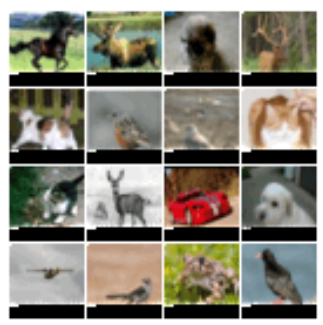

To allow the attention mechanism to capture patterns over the entire image, they chose to implement a two-dimensional factorization of the attention matrix. Thus, the network can attend to all positions through two steps of sparse attention. The first being strided attention in which each position attends to its row and column and the second being fixed attention in which it attends to fixed column and the elements after the latest column element. The visualization they provided helps visualize this process:

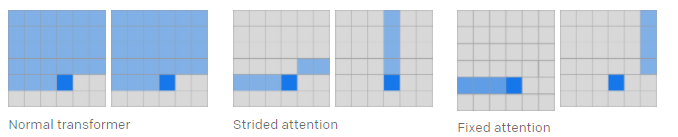

Now for the results. The new sparse transformer architecture produced incredible results on CIFAR-10, Enwik8 (text compression) and Imagenet 64. The results on CIFAR-10 are below, but additional tables for ENWIK8 and ImageNet 64 are provided in the source link. W, L, and H denote the width, length, and heads of the network, respectively.

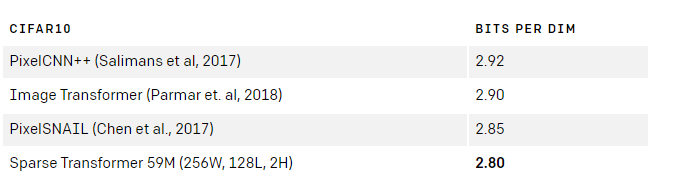




Surprisingly, sparse attention had lower loss than full attention while being faster. However, they hypothesize that this could be due to the sparse transformer having capabilities to understand patterns in the training data and generalize these beyond the data it was given. Additionally, there could be optimization problems with dense attention that limit its performance. To "prove" the first hypothesis they perform image completion on 64 $\times$ 64 ImageNet. Here are some of the completions.

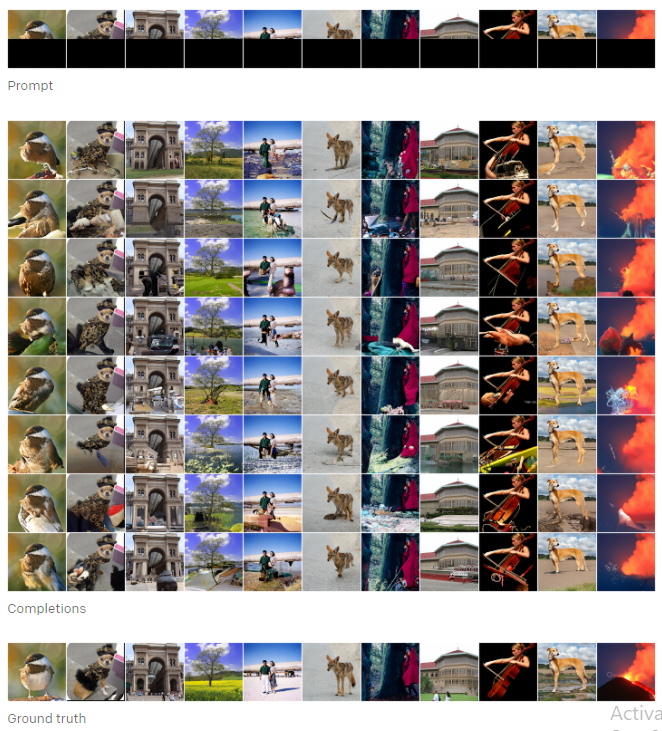

They also provide additional examples as well as generated audio. The researchers note that the sparse attention patterns are only introductory when it comes to efficient modeling of long sequences. While results are promising, they think different patterns and combinations of sparsity would have decent results. They think that combining this method with other approaches will give capabilities to deal with high dimensional data.

# Paper 2: Generative Pretraining from Pixels

Source: https://proceedings.icml.cc/static/paper_files/icml/2020/6022-Paper.pdf. The blogpost on OpenAI's website has some interesting completed images you can view https://openai.com/blog/image-gpt/. 

This paper borrows from progress in unsupervisd representation learning from natural language processing and shows that a similar technique can be used for images. Surprisingly, they are able to predict pixels without incorporating a 2D representation through an autoregressive prediction process. Their method has impressive results, eventually reaching 99% accuracy on CIFAR-10 with full fine tuning which is on par with cutting edge supervised pre-trianed models.


Early in the field of neural networks for computer vision and natural language processing, it was hypothesized that a model that learns the distribution of the data $p(x)$ would also learn features that could aid in supervised learning ($p(Y|x)$) performed later. It was assumed that pre-training, i.e. training the model from scratch, was necessary for success in supervised learning setting. Unsupervised pre-training, on the other hand, demonstrated that it was possible for results to be worse under this regime. This theory was upended in the domain of natural language processing where unsupervised pre-training showed promising results contradicting prior research. However, we have a new problem in that image data is higher dimensional, noisier, and more open-ended than NLP thus having more solutions to the same problem. With the improvements in self-supervised learning in respect to new training objectives, newer model architectures, and increased model capacity, there has been an ability to achieve better results in  low data environments. The authors note that generative pre-training methods have been popular for NLP in recent years, but have not been so for images in the past 10 years. The main point the researchers are examining is the effect of generative pre-training on images and how it can be as competitive as other self-supervised approaches, especially in the realm of low-resolution feature learning. Their approach will be evaluted on several datasets under different evaluation settings to further show the effectiveness of this approach.

So what is the approach? Their approach involves a pre-training step followed by fine-tuning where they examine autogregressive and BERT objectives. A BERT type objective in NLP is masking a single word in a sentence and then having a model predict what word has been hidden based on the context--how this relates to images will be explained later. Another modification to change from NLP to images is to apply a transformer to predict pixels rather than language tokens. The paper then briefly describes how pre taining can be viewed as "favorable initilzation", as a regularizer, or as a feature extractor. These are all points we have started to cover recently in our lecture on model distillation. In particular they are insterested with linear probing in which a model is applied to $X$ to produce features $f_X$. Next, a linear classification model is trained on the feature-label pairs ($f_X$, $Y$) with the reasoning being that a set of "good" features should linearly separate the classes of the transfer tasks. Furthermore, linear probes can distinguish feature quality from the model architecture i.e. separate models that are inherentely designed better for a specific task and models that received better pre-training. For an visual representation of the approach, they provide us with the following figure:

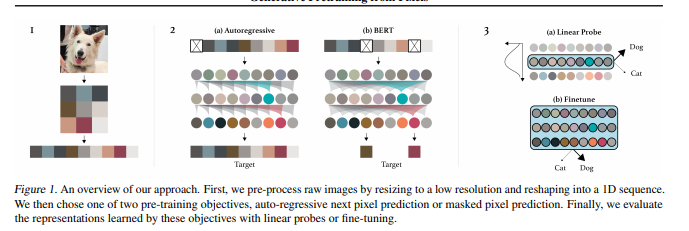


Now we move on to pre-training where the authors define it explicitly. We being by defining

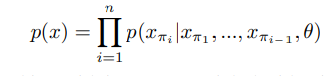

where: 
- $p(x)$ is the autoregressive density
- $X$ is an unlabeled dataset of high dimensionality
- $\pi$ is a permutation of the set [1,n]
- for images $\pi_i = i$ (identity permutation)

The model is then trained by minimizing the negative log-likelihood:

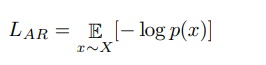

The researchers alos use the BERT objective which samples a sub-sequence $M\subset[1,n]$ where each index has probaility of 0.15 of appearing in $M$. This BERT mask ($M$) minimizes the negative log-likelihood of the masked elements $x_M$ conditioned on the unmasked ones $x_{[1,n]\backslash M}$. In other words, what is the likelihood the masked token at a specific position given the rest of the unmasked tokens.   

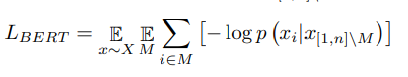

For pre-training, you pick either $L_{AR}$ or $L_{BERT}$ and minimize the loss on the pre-training set.

With pre training defined, we can move on to the definition of the model architecture. We first start with a transformer decorder that takes a sequence of tokens of size $n$ and produces a $d$-dimensional embedding for each position. The decoder consists of $L$ blocks where the $l-th$ produces an intermediate embedding $h_1^l, ... , h_n^l$ of $d$ dimensions. The researchers use the GPT-2 transformer decoder block which they define as the following sequence:
- 1. take an input tensor $h^l$
- 2. Apply layer normalization to the intermediate embedding-- $n^l$ = layer_norm($h^l$)
- 3. Next set $a^l$ = $h^l$ + multihead_attention($n^l$)
- 4. $h^{l+1} = a^l +$ mlp(layer_norm($a^l$))
- 5. all operations above are on a residual path to allow for scalability of the transformer

To ensure proper conditioning when using $L_{AR}$, an upper triangular mask is applied to the matrix of attention logits of size $n\times n$. With the BERT objective, this step is not required as you can zero out positions in $M$ (the sub--sequence) after applying embeddings to the input. Furthermore, it is important to note that the BERT model must learn spatial relationships between positions during training. The AR model fixes the ordering of the conditionals and, therefore, the previous statement is not necessarily true for the AR case.

Next, a layer norm follows the final transformer layer to transform step 4 above and learns a transform to logits, however, we ignore logits at unmasked positions in the BERT case. This new layer is called $n^L$ During the fine tuning phase we perform average pooling across the sequence dimension of $n^L$ to obtain a d-dimensional feature vector for each example, which we will call $f^L$. We then learn a projection from $f^L$ to class logits which is used to minimise cross entropy loss. They note that minimizing on just this loss function produces decent results but these results can be improved by including a joint objective including $L_{AR}$ or $L_{BERT}$ AND cross entropy loss.


To extract features for linear probing, you can instead include the average pooling mentioned above at a lower layer (or the final layer). They found that in this scenario, the best features are actually found in the middle of the network. Similarl to the fine tuning step, i.e. the previous paragraph, these features are projected to produce class logits and because these features are fixed when linear probing we only consider cross entropy loss as our optimization function.

Moving on to the methodology section they explore using ImageNet as a proxy for an unlabeled set of images in order to learn "general purpose" representations. Other popular small labeled datasets such as CIFAR-10, CIFAR-100, and STL-10 are used for tasks further down the pipeline. The researchers note that while supervised pre training is the current standard for image classifications, unsupervised /self-supervised pre-training can provide benefits in efficiency and fine-tuning speed. They explore these ideas through pre-training using ImageNet without labels and then fine tune or perform linear probing in a supervised fashion.

ImageNet ILSVRC 2012 is used as the training dataset with 4% of the data being used as an experimental validation. The validation set of ILSVRC 2012 is used as the test set. As for CIFAR-10, CIFAR-100, and STL-10 -- 10% of the data is used for validation. Unlabeled samples in STL-10 are ignored. They used some minor data augmentation when pre-training/fine tuning on ImageNet. However, their reason for doing so is not particular clear other than leaving us to assume that it is a necessary step to achieve better results. They resized images and took a random 224 $\times$ 224 crop and only used the center 224 $\times$ 224 crop in evaluation.

For fine tuning on CIFAR-10 and CIFAR-100 they use augmentation found in the Wide Residual Network paper in which 4 pixels are reflection padded on each side and a 32 $\times$ 32 crop is randomly samples from the padded image or its horizontal flip. When desired hyperparamters are chosen they reinsert the experimental validation set into the training set and retrain the model.

One issue that is encountered when applying an NLP approach is memory constraints when dealing with such high dimensionality of images. The attention logits explode in size compared to those you would find in an NLP model. To handle this, they reduced image sizes to 32x32, 48x48, 96x96, or 192x192 pixels and clustered the RGB channels using k-means with k=512. While this breaks permutation invariance it keeps the model spatially invariant. For ImageNet linear probes resolutions of $96^2 or 192^2$ is used with RGB channels intact. Using a variational auto encoder they are able to downsample images and keep a context length (model resolution) of $48^2$.

Moving on to the model: their largest is iGPT-L which they state is nearly identical to the NLP model GPT-2. One change of iGPT-L is that the embedding size is set to a slightly smaller value which results in marginally less parameter counts. They study a smaller version as well to examine how model capacity affects the quality of the generative model. For training, they tested a variety of learning rates and utiziled Adam as their optimization algorithm. In fine tuning, they used the same parameters as training and stop when maximum validation accuracy is reached. For the linear probe on ImageNet, they use SGD with momentum and a high learning rate while using L-BFGS on CIFAR-10, CIFAR-100, and STL-10.

Here are some results from after training for representation quality using linear probing. 

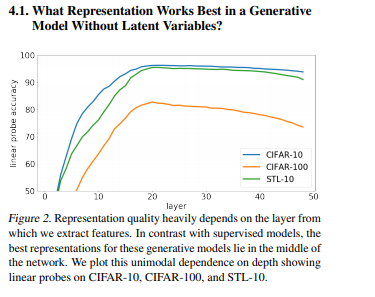

As mentioned previously, we see that the middle layers provide the best representations while later layers tend to trail off slightly in accuracy. Remember that these are from unsupervised pre-training, as they note that in supervised pre-training we would expect to see accuracy consistently increase until we reach the second to last layer. So what is the significance here? The significance is the fact that we never trained on these datasets and that the model was never explicitly trained for classification in the first place--the model was trained to generate images! From the graph, we can develop a hypothesis that that intermediate layers are actually best at representing global information and thus better at classification. The authors propose that generative models have two pases and is analagous to an encoder-decoder structure:
- 1. The network gathers information on low level information and builds information in a global context (first-middle layers)
- 2. This information is then specified in the final layers in order to predict the next pixel, e.g. what should be the pixel intensity, color, lighting, etc.

The researchers tested different sizes of models: a small, medium, and large network to see if better generative models also learn better representations. Using the linear probe to measure quality they found that bigger models perform better under the $L_{AR}$ regime (see figure below). This can be seen that at the same validation loss, the larger models are able to make better representations.

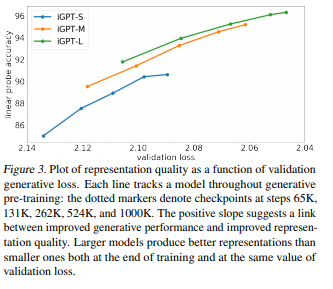

Comparing linear probe accuracies between different state of the art models yields impressive results. 

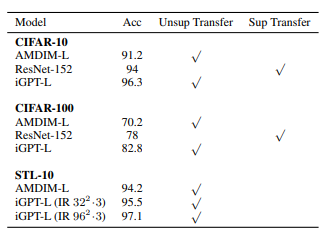

In the table we see that iGPT-L outperforms AMDIM-L and ResNet-152 on CIFAR-10, CIFAR-100, and STL-10 which are pre-trained on ImageNet without labels and pre-trained on ImageNet with labels, respectively. To achieve even better results on downstream tasks, we turn to full fine tuning to adapt the entire model for classification. Rather than choose the layer with the best linear probing to attach the classification head, they attach it to the last layer as it eventually will result in better results. On CIFAR-10, they achieve 99% accuracy and 88.5% accuracy on CIFAR-100. This outperforms the best supervised model, AutoAugment but keep in mind that iGPT only uses minimal augmentation. Here we can see the comparison of the top models on CIFAR-10 and CIFAR-100. I will admit that I am not super familiar with the architecture of these other models, but can explore them in future reports. The point here to take away is that iGPT is performing at the same level, if not better than state of the art models.

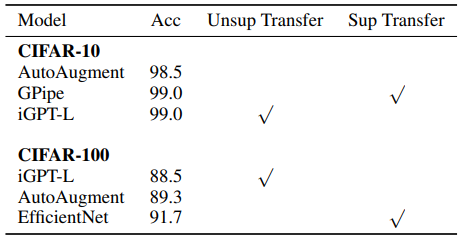

On ImageNet, they were able to achieve 66.3% accuracy after fine tuning at a model resolution of $32^2$, an improvement of 6% compared to linear probing. At a model resolution of $48^2$ they achieve 72.6% accuracy with similar improvements over linear probing. They also compared their model to one that has not been pre-trained and the results are substantially worse, showing a roughly 19% worse accuracy than the pretrained model after just 18 epochs. Interestingly, they found that including additional regularization with dropout did not provide any benefits.

Let us shift our focus to the BERT objective. For CIFAR-10, the autoregressive model out performs BERT in every layer, but in fine tuning BERT is very similar to AR. When it comes to ImageNet, BERT actually outperforms AR. Because the BERT model requires masking in the evaluation phase, they believe that this interferes with the model's ability to predict a class. To remedy this, they sample 5 masks for each input and take the most frequest predicted class as prediction and broke ties at random. This gave a decent improvement with a 1% increase in accuracy. While iGPT-L does quite well on CIFAR-10, it still falls short of the state of the art methods. 

For working in a low data scenario with CIFAR-10, they directly use a subset of the  dataset with no augmentations. As before, they extract features using the pre-trained model and train a linear classifier. They are able to achieve a 73.2% accuracy which substantially falls short of the state of the art model FixMatch. In this scenario larger models tend to fail and overfit the data as it memorizes a 40-example training set very quickly. The researchers think that improvements in semi-supervised learning will bring about improvements.

On related work, Genrative Adversarial Networks (GANs) and variational auto encoders (VAEs) have been used for their representation learning abilities. However, many models have not been competitive in the world of unsupervised learning. Their approach has drawn inspiration from a very wide range of research, which made this read a quite technical one. While the concepts are displayed in an understandable manner, reading more of the related works can help paint a fundamental understanding of why these techniques were considered.

At the end of the paper, they provide more technical details behind the hyperparameters used in model training which were found through trial and error with some intution. While I don't think this section of the paper really contributes to the overall points being made, it would be useful in reconstructing or replicating the findings in the paper. The variational auto encoder they used was an approach found in prior research where each encoder block has a downsampling convolution, ReLU, and a residual network. The decoder block is a reflection of this network. They note that while their autoencoders are of the scale of fewer than 200K parameters, performance with substantially larger autoencoders is similar.

What are the takeaways here? This paper demonstrated that generative (unsupervised) image modeling can perform quite well in learning image representations. They have shown that using a sequence transformer that draws its inspiration from NLP can be as effective as convolutional networks for unsupervised image classification and compete with some state of the art models on popular datasets such as CIFAR-10, CIFAR-100, and STL-10. Lastly, the AR objective allows for the generation of high quality samples which can be seen in their blog post (or at the very end of this paper).